In [1]:
#We import the libraries we're going to use.
%load_ext autoreload
%autoreload 2

import project_functions as pf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
import requests
from bs4 import BeautifulSoup
import folium
import json
import zipfile
import os
import kaggle

In [2]:
#We're going to use kaggle API to download our dataset.
from kaggle.api.kaggle_api_extended import KaggleApi
api = KaggleApi()
api.authenticate()

In [3]:
#We look for the available datasets for our search "lapd-crime"
!kaggle datasets list -s 'lapd-crime'

ref                                                              title                                             size  lastUpdated          downloadCount  voteCount  usabilityRating  
---------------------------------------------------------------  -----------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
kushsheth/los-angeles-police-department-lapd-crime-data          Los Angeles Police Department (LAPD) Crime Data   36MB  2024-09-10 10:32:53            531         22  1.0              
ishmaelkiptoo/usa-los-angeles-crimes-data-2020-to-2023           USA, Los Angeles Crimes Data: 2020 To 2023        41MB  2023-11-14 05:31:05           1195         32  1.0              
hemil26/crime-in-los-angeles                                     Los Angeles Crime Data                            43MB  2024-07-30 21:47:45           2099         75  1.0              
saurabhbadole/crime-incidents-in-los-angeles-2020-to-present     Crime

In [4]:
#We download the dataset we are interested in.
!kaggle datasets download -d "sumaiaparveenshupti/los-angeles-crime-data-20102020"

Dataset URL: https://www.kaggle.com/datasets/sumaiaparveenshupti/los-angeles-crime-data-20102020
License(s): CC0-1.0




  0%|          | 0.00/113M [00:00<?, ?B/s]
  1%|          | 1.00M/113M [00:00<00:42, 2.75MB/s]
  2%|1         | 2.00M/113M [00:00<00:24, 4.85MB/s]
  4%|3         | 4.00M/113M [00:00<00:12, 9.06MB/s]
  7%|7         | 8.00M/113M [00:00<00:06, 17.4MB/s]
 10%|9         | 11.0M/113M [00:00<00:05, 19.6MB/s]
 12%|#2        | 14.0M/113M [00:01<00:05, 18.2MB/s]
 14%|#4        | 16.0M/113M [00:01<00:05, 17.9MB/s]
 17%|#6        | 19.0M/113M [00:01<00:06, 15.0MB/s]
 20%|##        | 23.0M/113M [00:01<00:05, 17.6MB/s]
 24%|##3       | 27.0M/113M [00:01<00:04, 21.9MB/s]
 27%|##7       | 31.0M/113M [00:01<00:03, 25.7MB/s]
 31%|###       | 35.0M/113M [00:01<00:03, 26.3MB/s]
 34%|###4      | 39.0M/113M [00:02<00:02, 29.1MB/s]
 37%|###7      | 42.0M/113M [00:02<00:02, 29.6MB/s]
 40%|###9      | 45.0M/113M [00:02<00:02, 26.1MB/s]
 42%|####2     | 48.0M/113M [00:02<00:03, 18.6MB/s]
 45%|####5     | 51.0M/113M [00:02<00:03, 19.9MB/s]
 48%|####7     | 54.0M/113M [00:02<00:02, 21.9MB/s]
 51%|#####1    | 58.

In [6]:
#Now we unzip it.
z= zipfile.ZipFile('los-angeles-crime-data-20102020.zip')

z.extractall()

In [7]:
#We create a dataframe from the csv file.
df = pd.read_csv('Crime_Data_from_2010_to_2019.csv')

In [9]:
#We check the number of rows and columns in the DF.
df.shape

(2117589, 28)

In [10]:
#We check the column titles to see if they need cleaning.
df.columns

Index(['DR_NO', 'Date Rptd', 'DATE OCC', 'TIME OCC', 'AREA ', 'AREA NAME',
       'Rpt Dist No', 'Part 1-2', 'Crm Cd', 'Crm Cd Desc', 'Mocodes',
       'Vict Age', 'Vict Sex', 'Vict Descent', 'Premis Cd', 'Premis Desc',
       'Weapon Used Cd', 'Weapon Desc', 'Status', 'Status Desc', 'Crm Cd 1',
       'Crm Cd 2', 'Crm Cd 3', 'Crm Cd 4', 'LOCATION', 'Cross Street', 'LAT',
       'LON'],
      dtype='object')

In [11]:
df.columns.nunique()

28

In [12]:
df.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,1307355,02/20/2010 12:00:00 AM,02/20/2010 12:00:00 AM,1350,13,Newton,1385,2,900,VIOLATION OF COURT ORDER,...,AA,Adult Arrest,900.0,NaN,NaN,NaN,300 E GAGE AV,NaN,33.9825,-118.2695
1,11401303,09/13/2010 12:00:00 AM,09/12/2010 12:00:00 AM,45,14,Pacific,1485,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",...,IC,Invest Cont,740.0,NaN,NaN,NaN,SEPULVEDA BL,MANCHESTER AV,33.9599,-118.3962
2,70309629,08/09/2010 12:00:00 AM,08/09/2010 12:00:00 AM,1515,13,Newton,1324,2,946,OTHER MISCELLANEOUS CRIME,...,IC,Invest Cont,946.0,NaN,NaN,NaN,1300 E 21ST ST,NaN,34.0224,-118.2524
3,90631215,01/05/2010 12:00:00 AM,01/05/2010 12:00:00 AM,150,6,Hollywood,646,2,900,VIOLATION OF COURT ORDER,...,IC,Invest Cont,900.0,998.0,NaN,NaN,CAHUENGA BL,HOLLYWOOD BL,34.1016,-118.3295
4,100100501,01/03/2010 12:00:00 AM,01/02/2010 12:00:00 AM,2100,1,Central,176,1,122,"RAPE, ATTEMPTED",...,IC,Invest Cont,122.0,NaN,NaN,NaN,8TH ST,SAN PEDRO ST,34.0387,-118.2488


In [13]:
pf.clean_columns_2(df)

In [14]:
df.columns

Index(['file_number', 'date_reported', 'date_occured', 'time_occured', 'area',
       'crime_code', 'victim_age', 'victim_sex', 'victim_descent', 'premise',
       'weapon', 'status', 'location', 'lat', 'lon'],
      dtype='object')

In [15]:
#We check if there are any null values.
df.isna().sum()

file_number             0
date_reported           0
date_occured            0
time_occured            0
area                    0
crime_code              0
victim_age              0
victim_sex         196731
victim_descent     196777
premise               187
weapon            1406209
status                  0
location                0
lat                     0
lon                     0
dtype: int64

In [16]:
#Now we'll start dealing with the nulls.

In [17]:
df["victim_descent"].unique()

array(['H', 'W', 'B', 'A', 'O', 'X', 'K', nan, 'I', 'J', 'F', 'C', 'P',
       'V', 'U', 'G', 'D', 'S', 'Z', 'L', '-'], dtype=object)

In [18]:
pf.descent_cleaning(df)

In [19]:
#We check to see if we treated the nulls correctly.
df["victim_descent"].isna().sum()

0

In [20]:
#We check to see if the renaming of the elements in the column worked.
df["victim_descent"].unique()

array(['hispanic', 'white', 'black', 'asian', 'other', 'not_specified',
       'korean', 'american indian', 'japanese', 'filipino', 'chinese',
       'pacific islander', 'vietnamese', 'hawaiian', 'guamanian',
       'cambodian', 'samoan', 'asian indian', 'laotian'], dtype=object)

In [21]:
#We're checking for nulls.
df.isna().sum()

file_number             0
date_reported           0
date_occured            0
time_occured            0
area                    0
crime_code              0
victim_age              0
victim_sex         196731
victim_descent          0
premise               187
weapon            1406209
status                  0
location                0
lat                     0
lon                     0
dtype: int64

In [22]:
#We're checking to see if there are hidden nulls.
df["victim_sex"].value_counts()

victim_sex
M    975294
F    890255
X     55218
H        73
N        17
-         1
Name: count, dtype: int64

In [23]:
pf.sex_cleaning(df)

In [24]:
#We check if it worked.
df["victim_sex"].value_counts()

victim_sex
M                975294
F                890255
not_specified    252040
Name: count, dtype: int64

In [25]:
#We check if we handled nulls correctly.
df.isna().sum()

file_number             0
date_reported           0
date_occured            0
time_occured            0
area                    0
crime_code              0
victim_age              0
victim_sex              0
victim_descent          0
premise               187
weapon            1406209
status                  0
location                0
lat                     0
lon                     0
dtype: int64

In [26]:
#We're checking for nulls.
df["victim_age"].isna().sum()

0

In [27]:
#We're checking to see if there are "hidden" nulls. Here, age=0 is considered a null.
df["victim_age"].value_counts()

victim_age
 0      370038
 25      48145
 26      47508
 27      47061
 24      46798
         ...  
-9           8
-10          1
-11          1
 114         1
 118         1
Name: count, Length: 112, dtype: int64

In [28]:
pf.age_cleaning_2(df)

In [29]:
#We check if it worked.
df["victim_age"].value_counts()

victim_age
0     370681
25     48145
26     47508
27     47061
24     46798
       ...  
94       330
95       246
96       190
97       169
98       118
Name: count, Length: 99, dtype: int64

In [30]:
pf.premise_cleaning(df)

In [31]:
df.isna().sum()

file_number             0
date_reported           0
date_occured            0
time_occured            0
area                    0
crime_code              0
victim_age              0
victim_sex              0
victim_descent          0
premise                 0
weapon            1406070
status                  0
location                0
lat                     0
lon                     0
dtype: int64

In [32]:
#We check for nulls 
df["weapon"].isna().sum()

1406070

In [33]:
pf.weapon_cleaning(df)

In [34]:
#We check if it works.
df["weapon"].isna().sum()

0

In [35]:
#Now we're going to clean the date and time.

In [36]:
df.head()

,file_number,date_reported,date_occured,time_occured,area,crime_code,victim_age,victim_sex,victim_descent,premise,weapon,status,location,lat,lon
0,1307355,02/20/2010 12:00:00 AM,02/20/2010 12:00:00 AM,1350,Newton,VIOLATION OF COURT ORDER,48,M,hispanic,SINGLE FAMILY DWELLING,not_specified,Adult Arrest,300 E GAGE AV,33.9825,-118.2695
1,11401303,09/13/2010 12:00:00 AM,09/12/2010 12:00:00 AM,45,Pacific,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",0,M,white,STREET,not_specified,Invest Cont,SEPULVEDA BL,33.9599,-118.3962
2,70309629,08/09/2010 12:00:00 AM,08/09/2010 12:00:00 AM,1515,Newton,OTHER MISCELLANEOUS CRIME,0,M,hispanic,ALLEY,not_specified,Invest Cont,1300 E 21ST ST,34.0224,-118.2524
3,90631215,01/05/2010 12:00:00 AM,01/05/2010 12:00:00 AM,150,Hollywood,VIOLATION OF COURT ORDER,47,F,white,STREET,HAND GUN,Invest Cont,CAHUENGA BL,34.1016,-118.3295
4,100100501,01/03/2010 12:00:00 AM,01/02/2010 12:00:00 AM,2100,Central,"RAPE, ATTEMPTED",47,F,hispanic,ALLEY,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",Invest Cont,8TH ST,34.0387,-118.2488


In [37]:
pf.date_cleaning(df)

C:\Users\diego\Documents\IRONHACK\DATA_ANALYTICS\WEEK_3\PROJECT\project_functions.py:154: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df.loc[:, 'date_reported'] = pd.to_datetime(df['date_reported'], errors = "coerce").dt.date
C:\Users\diego\Documents\IRONHACK\DATA_ANALYTICS\WEEK_3\PROJECT\project_functions.py:162: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df.loc[:, 'date_occured'] = pd.to_datetime(df['date_occured'], errors = "coerce").dt.date


In [38]:
df.head()

,file_number,date_reported,date_occured,time_occured,area,crime_code,victim_age,victim_sex,victim_descent,premise,...,status,location,lat,lon,dr_year,dr_month,dr_day,do_year,do_month,do_day
0,1307355,2010-02-20,2010-02-20,13:50,Newton,VIOLATION OF COURT ORDER,48,M,hispanic,SINGLE FAMILY DWELLING,...,Adult Arrest,300 E GAGE AV,33.9825,-118.2695,2010,2,20,2010,2,20
1,11401303,2010-09-13,2010-09-12,00:45,Pacific,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",0,M,white,STREET,...,Invest Cont,SEPULVEDA BL,33.9599,-118.3962,2010,9,13,2010,9,12
2,70309629,2010-08-09,2010-08-09,15:15,Newton,OTHER MISCELLANEOUS CRIME,0,M,hispanic,ALLEY,...,Invest Cont,1300 E 21ST ST,34.0224,-118.2524,2010,8,9,2010,8,9
3,90631215,2010-01-05,2010-01-05,01:50,Hollywood,VIOLATION OF COURT ORDER,47,F,white,STREET,...,Invest Cont,CAHUENGA BL,34.1016,-118.3295,2010,1,5,2010,1,5
4,100100501,2010-01-03,2010-01-02,21:00,Central,"RAPE, ATTEMPTED",47,F,hispanic,ALLEY,...,Invest Cont,8TH ST,34.0387,-118.2488,2010,1,3,2010,1,2


In [39]:
df.dtypes

file_number                int64
date_reported     datetime64[ns]
date_occured      datetime64[ns]
time_occured              object
area                      object
crime_code                object
victim_age                 int64
victim_sex                object
victim_descent            object
premise                   object
weapon                    object
status                    object
location                  object
lat                      float64
lon                      float64
dr_year                    int32
dr_month                   int32
dr_day                     int32
do_year                    int32
do_month                   int32
do_day                     int32
dtype: object

In [40]:
#We only want to keep crimes commited since 2017.
df = df[df["date_occured"].dt.year >= 2017]

In [41]:
df.shape

(677117, 21)

In [42]:
#NOW WE HAVE A CLEANED DF. NOW WE CAN START WORKING WITH IT.

In [43]:
#First, we're going to create "categories" for the weapons, crime_code and premise.

In [44]:
#We check the unique values for weapon.
df["weapon"].unique()

array(['not_specified', 'STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)',
       'HAND GUN', 'VERBAL THREAT', 'MACE/PEPPER SPRAY',
       'CAUSTIC CHEMICAL/POISON', 'UNKNOWN WEAPON/OTHER WEAPON',
       'ROCK/THROWN OBJECT', 'KNIFE WITH BLADE 6INCHES OR LESS',
       'REVOLVER', 'CLUB/BAT', 'AIR PISTOL/REVOLVER/RIFLE/BB GUN',
       'FIXED OBJECT', 'SEMI-AUTOMATIC PISTOL', 'SIMULATED GUN',
       'UNKNOWN FIREARM', 'OTHER KNIFE', 'FOLDING KNIFE', 'MACHETE',
       'KNIFE WITH BLADE OVER 6 INCHES IN LENGTH', 'HAMMER',
       'SCALDING LIQUID', 'VEHICLE', 'SCREWDRIVER', 'STICK',
       'BLUNT INSTRUMENT', 'TIRE IRON', 'PHYSICAL PRESENCE',
       'KITCHEN KNIFE', 'BOTTLE', 'DIRK/DAGGER', 'SCISSORS', 'FIRE',
       'AXE', 'GLASS', 'BELT FLAILING INSTRUMENT/CHAIN',
       'UNKNOWN TYPE CUTTING INSTRUMENT', 'PIPE/METAL PIPE',
       'OTHER CUTTING INSTRUMENT', 'CONCRETE BLOCK/BRICK', 'RAZOR',
       'STUN GUN', 'DEMAND NOTE', 'RIFLE', 'BOARD', 'TOY GUN', 'SHOTGUN',
       'SEMI-AUTOMATIC RIF

In [45]:
#We call a function to group weapons by class.
df.loc[:, 'weapon_class'] = df['weapon'].apply(pf.weapon_class)
# Display the updated DataFrame
print(df[['weapon', 'weapon_class']])

                                                 weapon   weapon_class
1380330                                   not_specified  not_specified
1380666                                   not_specified  not_specified
1380780                                   not_specified  not_specified
1380836                                   not_specified  not_specified
1380864                                   not_specified  not_specified
...                                                 ...            ...
2117584                                            FIRE          other
2117585                                   not_specified  not_specified
2117586  STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)     bare_hands
2117587                                   not_specified  not_specified
2117588                                   not_specified  not_specified

[677117 rows x 2 columns]


In [46]:
#We check to see the value counts for each weapons class.
df["weapon_class"].value_counts()

weapon_class
not_specified    465493
bare_hands       151085
other             31003
blade             14436
blunt_weapon       7213
rifle              4159
handgun            2628
long_blade          773
shotgun             327
Name: count, dtype: int64

In [47]:
#We check the unique values for crime_code.

df["crime_code"].unique()

array(['VEHICLE - STOLEN', 'BURGLARY', 'THEFT, PERSON',
       'VIOLATION OF COURT ORDER',
       'ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT',
       'BRANDISH WEAPON', 'THEFT PLAIN - PETTY ($950 & UNDER)',
       'BURGLARY FROM VEHICLE', 'BATTERY - SIMPLE ASSAULT',
       'RAPE, FORCIBLE', 'CRIMINAL THREATS - NO WEAPON DISPLAYED',
       'THEFT OF IDENTITY',
       'VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS)',
       'DOCUMENT FORGERY / STOLEN FELONY',
       'INTIMATE PARTNER - SIMPLE ASSAULT',
       'THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER)',
       'ATTEMPTED ROBBERY', 'BIKE - STOLEN', 'OTHER MISCELLANEOUS CRIME',
       'EMBEZZLEMENT, GRAND THEFT ($950.01 & OVER)',
       'THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LIVESTK,PROD',
       'ROBBERY', 'TRESPASSING', 'VIOLATION OF RESTRAINING ORDER',
       'OTHER ASSAULT', 'THROWING OBJECT AT MOVING VEHICLE',
       'VANDALISM - MISDEAMEANOR ($399 OR UNDER)',
       'THEFT FROM MOTOR VEHICLE - GRAND ($400 AN

In [48]:
#We call a function to group crimes by class.

df.loc[:, 'crime_categories'] = df['crime_code'].apply(pf.crime_categories)

# Display the updated DataFrame
print(df[['crime_code', 'crime_categories']])

                                               crime_code  \
1380330                                  VEHICLE - STOLEN   
1380666                                  VEHICLE - STOLEN   
1380780                                  VEHICLE - STOLEN   
1380836                                  VEHICLE - STOLEN   
1380864                                          BURGLARY   
...                                                   ...   
2117584                                             ARSON   
2117585  THEFT FROM MOTOR VEHICLE - GRAND ($400 AND OVER)   
2117586            CRIMINAL THREATS - NO WEAPON DISPLAYED   
2117587   THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER)   
2117588                             BURGLARY FROM VEHICLE   

              crime_categories  
1380330  theft_related_offense  
1380666  theft_related_offense  
1380780  theft_related_offense  
1380836  theft_related_offense  
1380864  theft_related_offense  
...                        ...  
2117584         property_crime  
211

In [49]:
#We check to see if it worked correctly.
df["crime_categories"].unique()

array(['theft_related_offense', 'property_crime', 'violent_crime',
       'miscellaneous_crime', 'public_order_offense', 'sex_crime',
       'fraud'], dtype=object)

In [50]:
#We check to see the value counts for each crime class.

df["crime_categories"].value_counts()

crime_categories
theft_related_offense    380503
violent_crime            179841
property_crime            83516
sex_crime                 15523
public_order_offense      11464
miscellaneous_crime        5638
fraud                       632
Name: count, dtype: int64

In [51]:
#We check the unique values for crime_code.
df["premise"].unique()

array(['STREET', 'OTHER BUSINESS', 'PARKING LOT', 'SIDEWALK',
       'MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)', 'GARAGE/CARPORT',
       'MEDICAL/DENTAL OFFICES', 'SINGLE FAMILY DWELLING',
       'POLICE FACILITY', 'DEPARTMENT STORE', 'NURSERY/FLOWER SHOP',
       'THEATRE/MOVIE', 'TRANSITIONAL HOUSING/HALFWAY HOUSE',
       'PARKING UNDERGROUND/BUILDING', 'YARD (RESIDENTIAL/BUSINESS)',
       'VEHICLE, PASSENGER/TRUCK', 'DRIVEWAY', 'BEAUTY/BARBER SHOP',
       'MTA BUS', 'TRANSPORTATION FACILITY (AIRPORT)',
       'RESTAURANT/FAST FOOD', 'OTHER/OUTSIDE',
       'TRAIN DEPOT/TERMINAL, OTHER THAN MTA', 'ELEMENTARY SCHOOL',
       'BANK', 'PARK/PLAYGROUND', 'HOSPITAL', 'PUBLIC STORAGE',
       'CREDIT UNION', 'MTA - ORANGE LINE - CHATSWORTH',
       'SPECIALTY SCHOOL/OTHER', 'MOTEL', 'CELL PHONE STORE',
       'LIQUOR STORE', 'FURNITURE STORE', 'ALLEY',
       'DISCOUNT STORE (99 CENT,DOLLAR,ETC.', 'OTHER RESIDENCE',
       'CYBERSPACE', 'MARKET', 'CHECK CASHING*', 'GAS STATION',
  

In [52]:
#We call a function to group premises by class.

df.loc[:, 'premise_class'] = df['premise'].apply(pf.premise_class)

# Display the updated DataFrame
print(df[['premise', 'premise_class']])

                                                   premise     premise_class
1380330                                             STREET      public_place
1380666                                             STREET      public_place
1380780                                             STREET      public_place
1380836                                             STREET      public_place
1380864                                     OTHER BUSINESS  public_transport
...                                                    ...               ...
2117584  SEX ORIENTED/BOOK STORE/STRIP CLUB/GENTLEMAN'S...  commercial_space
2117585                                             STREET      public_place
2117586                                           SIDEWALK      public_place
2117587                                             STREET      public_place
2117588                                     GARAGE/CARPORT      public_place

[677117 rows x 2 columns]


In [53]:
#We check to see if it worked correctly.
df["premise_class"].unique()

array(['public_place', 'public_transport', 'leisure_area',
       'residential_area', 'healthcare_facilities',
       'government_facilities', 'commercial_space', 'other',
       'educational_facilities', 'financial_institutions', 'cyber_space',
       'religious_facilities', 'industrial_facilities'], dtype=object)

In [54]:
#We check to see the value counts for each premise class.

df["premise_class"].value_counts()

premise_class
residential_area          228543
public_place              225535
public_transport           76411
leisure_area               59430
commercial_space           55087
educational_facilities      9963
government_facilities       7127
other                       5333
healthcare_facilities       5244
financial_institutions      2435
religious_facilities        1645
industrial_facilities        198
cyber_space                  166
Name: count, dtype: int64

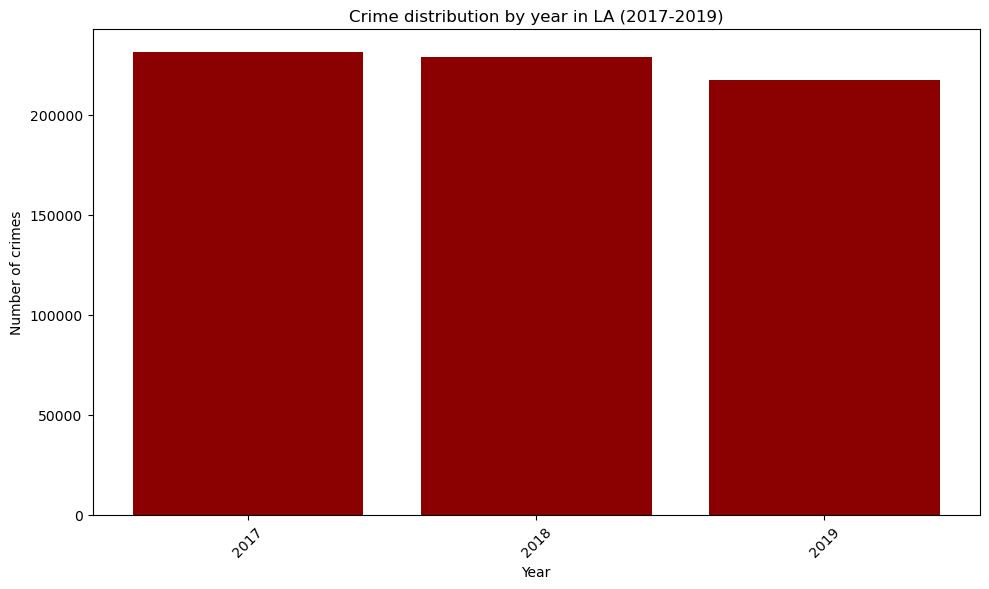

In [55]:
# Creating the bar graph
year_counts = df['do_year'].value_counts()
year = year_counts.index

plt.figure(figsize=(10, 6))
plt.bar(year, year_counts, color="darkred")

# Adding labels and title
plt.xlabel('Year')
plt.ylabel('Number of crimes')
plt.title('Crime distribution by year in LA (2017-2019)')

# Displaying the graph
plt.xticks(ticks=year, labels=year, rotation=45)
plt.tight_layout()
#plt.ylim(0, 200000)
plt.show()

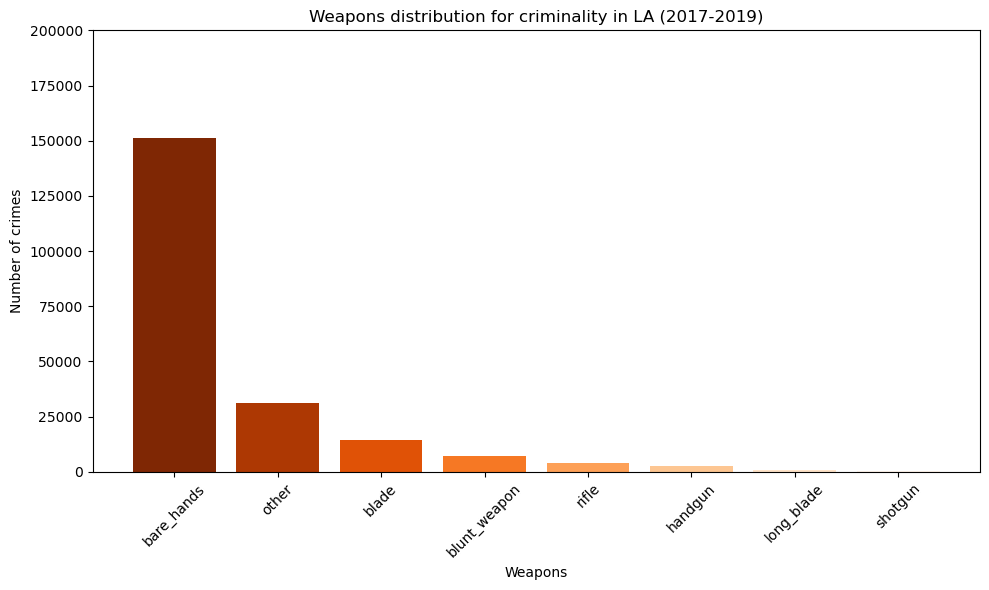

In [56]:
# Creating the bar graph
weapon_counts = df['weapon_class'].value_counts()[1:]
weapon_class = weapon_counts.index

plt.figure(figsize=(10, 6))
colors = plt.cm.Oranges(np.linspace(1, 0, len(weapon_class)))
plt.bar(weapon_class, weapon_counts, color=colors)

# Adding labels and title
plt.xlabel('Weapons')
plt.ylabel('Number of crimes')
plt.title('Weapons distribution for criminality in LA (2017-2019)')

# Displaying the graph
plt.xticks(rotation=45)
plt.tight_layout()
plt.ylim(0, 200000)
plt.show()

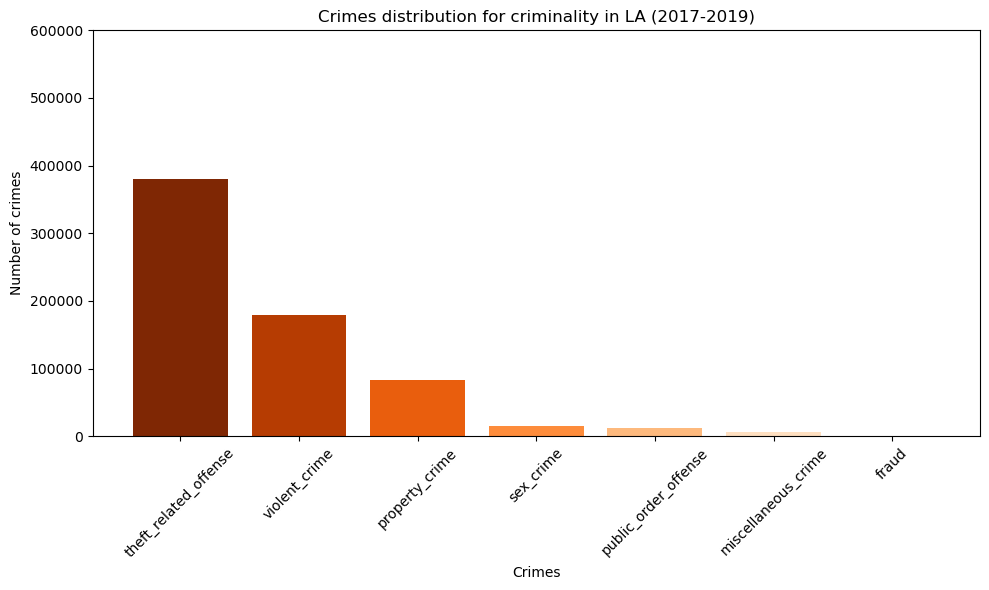

In [57]:
# Creating the bar graph

crime_categories_counts = df["crime_categories"].value_counts()
crime_categories = crime_categories_counts.index

plt.figure(figsize=(10, 6))
colors = plt.cm.Oranges(np.linspace(1, 0, len(crime_categories)))
plt.bar(crime_categories, crime_categories_counts, color=colors)

# Adding labels and title
plt.xlabel('Crimes')
plt.ylabel('Number of crimes')
plt.title('Crimes distribution for criminality in LA (2017-2019)')

# Displaying the graph
plt.xticks(rotation=45)
plt.tight_layout()
plt.ylim(0, 600000)
plt.show()

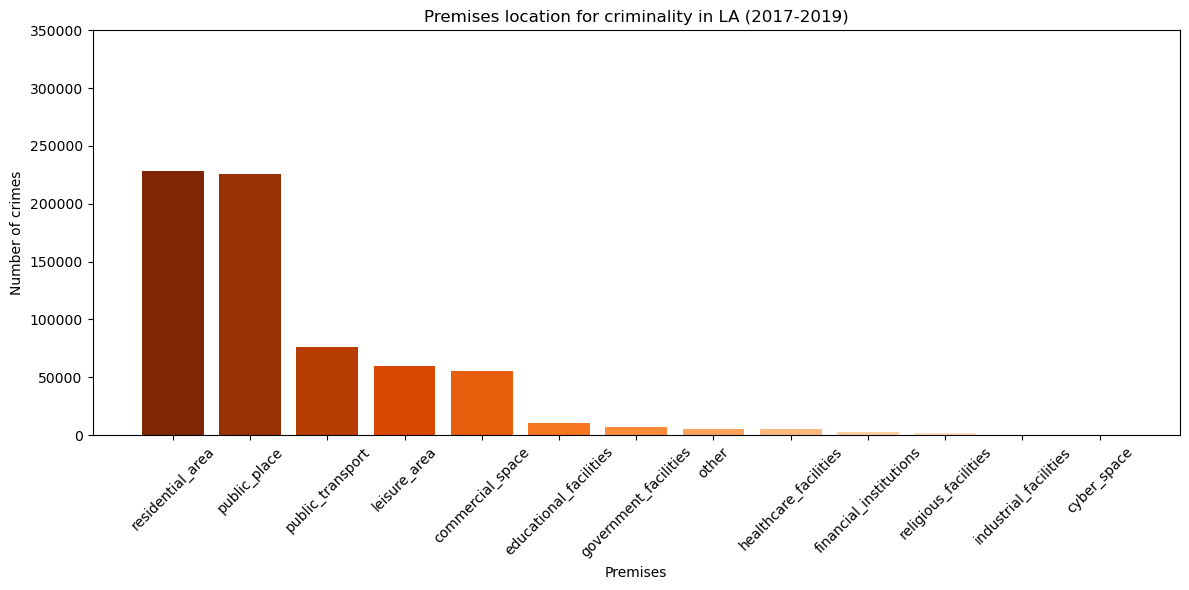

In [58]:
# Creating the bar graph

premise_class_counts = df["premise_class"].value_counts()
premise_class = premise_class_counts.index


plt.figure(figsize=(12, 6))
colors = plt.cm.Oranges(np.linspace(1, 0, len(premise_class)))
plt.bar(premise_class, premise_class_counts, color=colors)

# Adding labels and title
plt.xlabel('Premises')
plt.ylabel('Number of crimes')
plt.title('Premises location for criminality in LA (2017-2019)')

# Displaying the graph
plt.xticks(rotation=45)
plt.tight_layout()
plt.ylim(0, 350000)
plt.show()

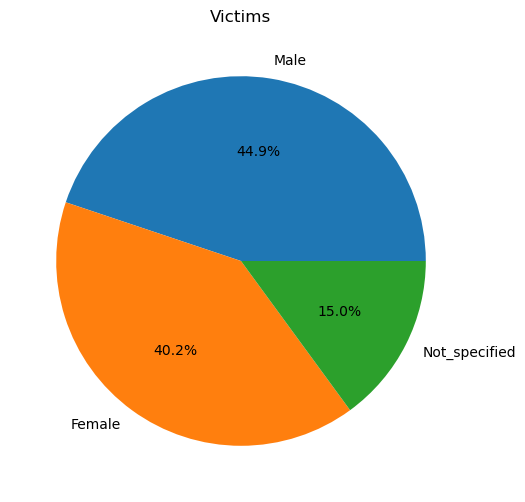

In [59]:
#Creating a pie chart
victim_counts = df['victim_sex'].value_counts()
victim_counts.index = victim_counts.index.map({'M': 'Male', 'F': 'Female', 'not_specified': 'Not_specified'})
plt.figure(figsize=(6, 6))
victim_counts.plot(kind='pie', autopct='%1.1f%%')
plt.title('Victims')
plt.ylabel('')
plt.show()

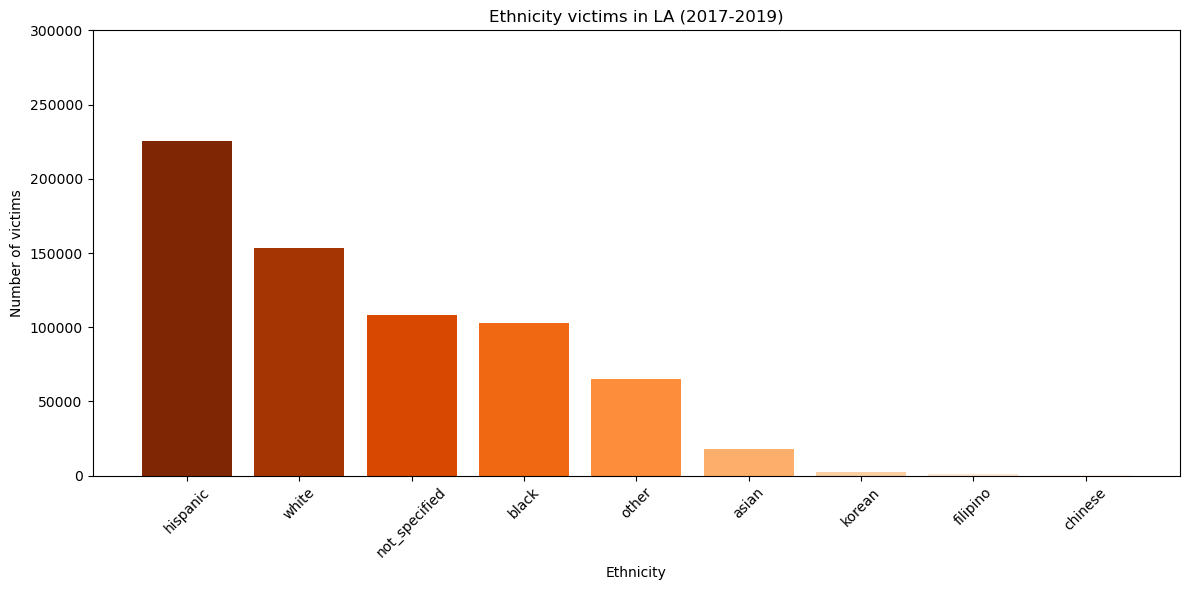

In [60]:
# Creating the bar graph for ethnicity.

victim_descent_counts = df['victim_descent'].value_counts()[:9]
victim_descent = victim_descent_counts.index

plt.figure(figsize=(12, 6))
colors = plt.cm.Oranges(np.linspace(1, 0, len(victim_descent)))
plt.bar(victim_descent, victim_descent_counts, color=colors)

# Adding labels and title
plt.xlabel('Ethnicity')
plt.ylabel('Number of victims')
plt.title('Ethnicity victims in LA (2017-2019)')

# Displaying the graph
plt.xticks(rotation=45)
plt.tight_layout()
plt.ylim(0, 300000)
plt.show()

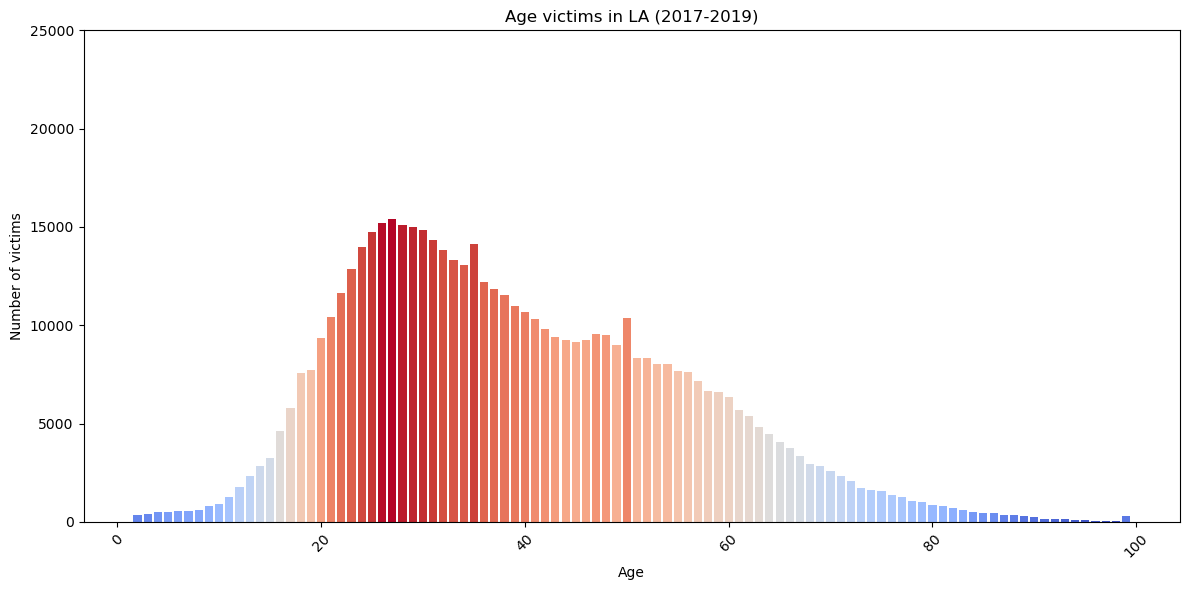

In [61]:
# Creating the bar graph for age. We removed the values = 0 which correspond to our "not_specified".

victim_age_counts = df['victim_age'].value_counts()[1:]
victim_age = victim_age_counts.index


#We applied a coolwarm color scale to effectively show the age distribution of the victims.
plt.figure(figsize=(12, 6))
colors = plt.cm.coolwarm(np.linspace(1, 0, len(victim_age)))
plt.bar(victim_age, victim_age_counts, color=colors)

# Adding labels and title
plt.xlabel('Age')
plt.ylabel('Number of victims')
plt.title('Age victims in LA (2017-2019)')

# Displaying the graph
plt.xticks(rotation=45)
plt.tight_layout()
plt.ylim(0, 25000)
plt.show()

In [62]:
grouped_1 = df.groupby(["do_year","do_month"]).agg({"do_month": "count"})

In [63]:
grouped_1 = grouped_1.rename(columns = {"do_month": "num_crimes"}).reset_index()

In [64]:
grouped_1

,do_year,do_month,num_crimes
0,2017,1,19617
1,2017,2,17103
2,2017,3,19400
3,2017,4,18748
4,2017,5,19445
5,2017,6,19027
6,2017,7,20147
7,2017,8,19702
8,2017,9,19413
9,2017,10,20391


In [65]:
df["categorized_time"] = df["time_occured"].apply(pf.categorize_cleaned_time)

In [66]:
df["categorized_time"].value_counts()

categorized_time
20:00-05:00    226359
17:00-20:00    118136
12:00-15:00    112378
08:00-12:00    110343
15:00-17:00     70401
05:00-08:00     39500
Name: count, dtype: int64

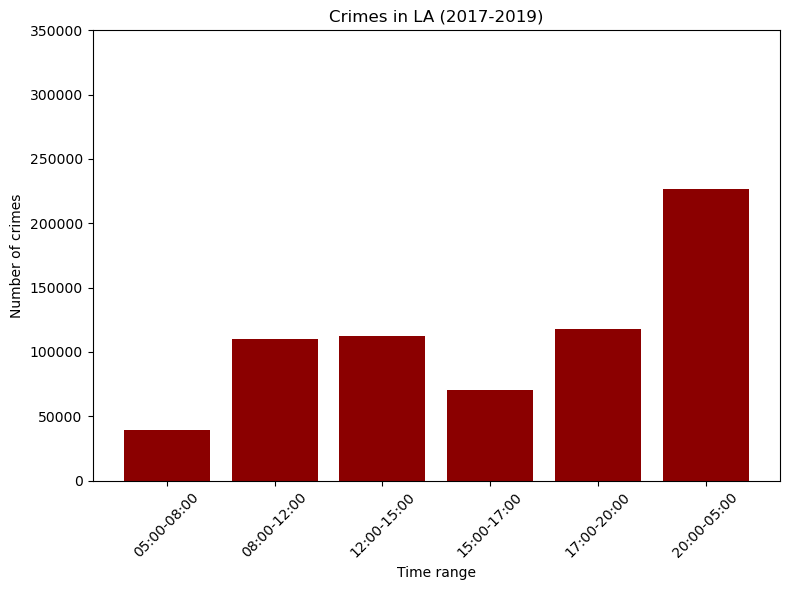

In [67]:
# Creating the bar graph for times of day. 

categorized_time_counts = df['categorized_time'].value_counts().sort_index()
categorized_time = categorized_time_counts.index


#We applied a coolwarm color scale to effectively show the age distribution of the victims.
plt.figure(figsize=(8, 6))
#colors = plt.cm.Oranges(np.linspace(1, 0, len(categorized_time)))
plt.bar(categorized_time, categorized_time_counts, color="darkred")

# Adding labels and title
plt.xlabel('Time range')
plt.ylabel('Number of crimes')
plt.title('Crimes in LA (2017-2019)')

# Displaying the graph
plt.xticks(rotation=45)
plt.tight_layout()
plt.ylim(0, 350000)
plt.show()

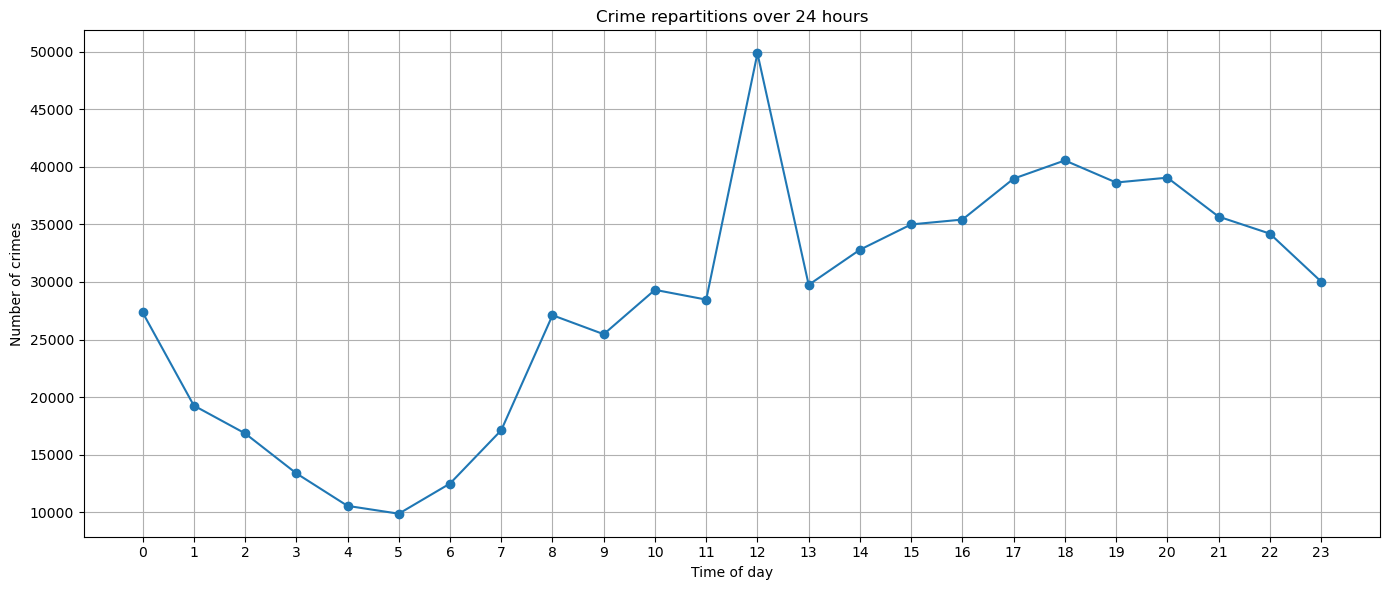

In [68]:
# Ensure 'time_occured' is in the correct format, then extract hour and minute
df['time_occured'] = pd.to_datetime(df['time_occured'], format='%H:%M')

# Create a new column for the time in minutes since midnight
df['time_in_minutes'] = df['time_occured'].dt.hour

# Count occurrences for each minute of the day
minute_counts = df['time_in_minutes'].value_counts().sort_index()

# Create a line plot
plt.figure(figsize=(14, 6))
plt.plot(minute_counts.index, minute_counts.values, marker='o', linestyle='-')
plt.title('Crime repartitions over 24 hours')
plt.xlabel('Time of day')
plt.ylabel('Number of crimes')

# Set x-ticks to every hour
plt.xticks(ticks=range(0, 24))

plt.grid()
plt.tight_layout()
plt.show()

In [69]:
location_df =df[["area", "lon", "lat"]]


In [70]:
location_df = location_df.groupby(["area"]).agg({"area":"count", "lon": "median", "lat": "median"})

In [71]:
location_df.rename({"area": "crimes"}, axis=1, inplace=True)

In [72]:
location_df.reset_index(inplace=True)

In [73]:
map = folium.Map(location=[location_df.lat.median(), location_df.lon.median()], zoom_start=10, control_scale=True)

In [74]:
for index, location_info  in location_df.iterrows():
    folium.Marker([location_info["lat"], location_info["lon"]], popup=location_info["area"]).add_to(map)

In [75]:
map

In [76]:
df["clean_weapon"] = df.loc[df["weapon_class"] != "not_specified", "weapon_class"]

In [77]:
df["clean_weapon"].value_counts()

clean_weapon
bare_hands      151085
other            31003
blade            14436
blunt_weapon      7213
rifle             4159
handgun           2628
long_blade         773
shotgun            327
Name: count, dtype: int64

In [78]:
df["victim_age"].describe()

count    677117.000000
mean         31.852293
std          21.126522
min           0.000000
25%          19.000000
50%          32.000000
75%          47.000000
max          99.000000
Name: victim_age, dtype: float64

In [79]:
crime_crosstab = pd.crosstab(df["clean_weapon"], df["crime_categories"])

In [80]:
crime_crosstab

crime_categories,fraud,miscellaneous_crime,property_crime,public_order_offense,sex_crime,theft_related_offense,violent_crime
clean_weapon,,,,,,,
bare_hands,125,152,3070,997,4403,25671,116667
blade,4,16,236,7,46,3393,10734
blunt_weapon,3,3,542,12,7,1055,5591
handgun,1,4,152,2,1,782,1686
long_blade,0,1,15,1,2,85,669
other,25,239,1696,956,598,4082,23407
rifle,15,14,268,2,9,1615,2236
shotgun,1,2,26,0,0,101,197


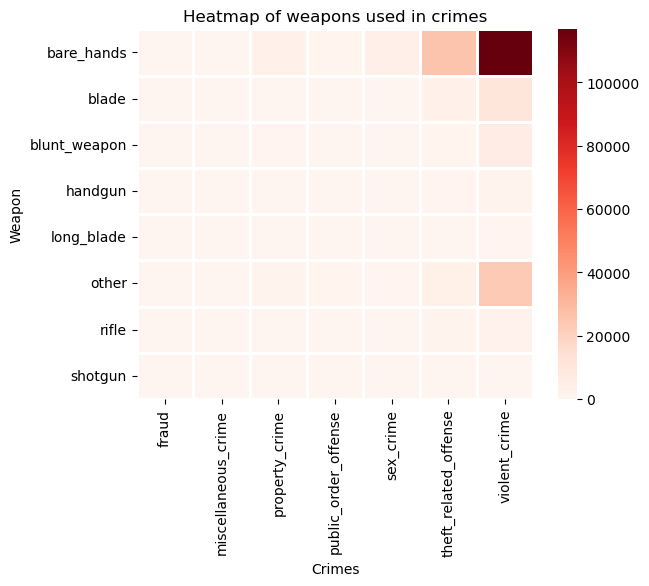

In [81]:
heat_map = sns.heatmap(crime_crosstab, linewidths = 1, cmap="Reds")

plt.title("Heatmap of weapons used in crimes")
plt.xlabel("Crimes")
plt.ylabel("Weapon")


plt.show()

In [82]:
location_crosstab = pd.crosstab(df["area"], df["crime_categories"])

In [83]:
location_crosstab

crime_categories,fraud,miscellaneous_crime,property_crime,public_order_offense,sex_crime,theft_related_offense,violent_crime
area,,,,,,,
77th Street,42,360,5524,894,933,20925,15908
Central,41,414,4292,301,696,20069,12848
Devonshire,28,201,3214,541,710,18676,5792
Foothill,24,210,3399,308,584,13024,6278
Harbor,24,244,3919,643,588,14113,7914
Hollenbeck,16,175,3908,710,656,12644,8082
Hollywood,33,328,4727,444,759,19011,8524
Mission,32,244,3971,675,890,15930,8338
N Hollywood,29,347,4766,253,810,21413,7862


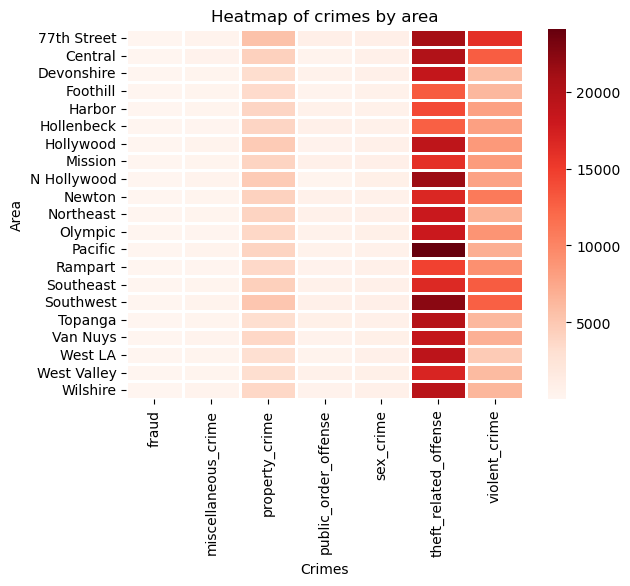

In [84]:
heat_map = sns.heatmap(location_crosstab, linewidths = 1, cmap="Reds")

plt.title("Heatmap of crimes by area")
plt.xlabel("Crimes")
plt.ylabel("Area")


plt.show()

In [85]:
df["clean_sex"] = df.loc[df["victim_sex"] != "not_specified", "victim_sex"]

In [86]:
sex_crosstab = pd.crosstab(df["crime_categories"],df["clean_sex"])

In [87]:
sex_crosstab

clean_sex,F,M
crime_categories,,
fraud,291,242
miscellaneous_crime,1940,2697
property_crime,34324,39863
public_order_offense,7337,3573
sex_crime,11206,3784
theft_related_offense,122045,170371
violent_crime,95027,83183


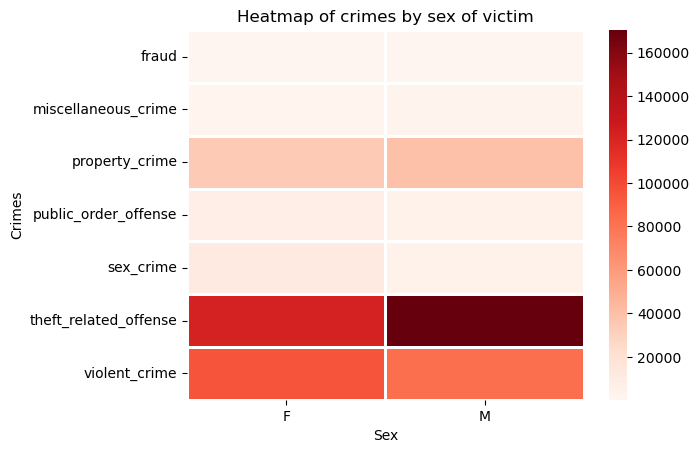

In [88]:
heat_map = sns.heatmap(sex_crosstab, linewidths = 1, cmap="Reds")

plt.title("Heatmap of crimes by sex of victim")
plt.xlabel("Sex")
plt.ylabel("Crimes")


plt.show()

In [89]:
#Additional information related to the project.
#This function webscrapes wikipedia for basic info about the President of the United States, mayor and LAPD chief.

In [90]:
pf.chief_info()

Name: Dominic Choi
Preceded by: Michel Moore
Born: Los Angeles, California, U.S.
Alma mater: University of Southern California
Department:  Los Angeles Police Department
Serviceyears: 1995–present
Rank:  Chief of police – 2024Sworn in as a Police Officer: 1995


C:\Users\diego\Documents\IRONHACK\DATA_ANALYTICS\WEEK_3\PROJECT\project_functions.py:294: GuessedAtParserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 294 of the file C:\Users\diego\Documents\IRONHACK\DATA_ANALYTICS\WEEK_3\PROJECT\project_functions.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  chief_soup = BeautifulSoup(chief_response.content)


In [91]:
pf.mayor_info()

Name: Karen Bass
Style: Her Honor
Residence: Getty House
Term length: Four years (renewable once)
Inaugural holder: Alpheus P. Hodges
Formation: 1850
Salary: $269,365
Website: mayor.lacity.gov


C:\Users\diego\Documents\IRONHACK\DATA_ANALYTICS\WEEK_3\PROJECT\project_functions.py:325: GuessedAtParserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 325 of the file C:\Users\diego\Documents\IRONHACK\DATA_ANALYTICS\WEEK_3\PROJECT\project_functions.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  mayor_soup = BeautifulSoup(mayor_response.content)


In [92]:
pf.president_info()

C:\Users\diego\Documents\IRONHACK\DATA_ANALYTICS\WEEK_3\PROJECT\project_functions.py:356: GuessedAtParserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 356 of the file C:\Users\diego\Documents\IRONHACK\DATA_ANALYTICS\WEEK_3\PROJECT\project_functions.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  president_soup = BeautifulSoup(president_response.content)


Name: Joe Biden
Style: 
Mr. President[1][2] (informal)
The Honorable[3] (formal)
His Excellency[4][5] (diplomatic)

Type: 
Head of state
Head of government
Commander-in-chief

Abbreviation: POTUS
Member of: 
Cabinet
Domestic Policy Council
National Economic Council
National Security Council

Residence: White House
Seat: Washington, D.C.
Appointer: Electoral College or via succession
Term length: Four years, renewable once
Constituting instrument: Constitution of the United States
Formation: March 4, 1789(235 years ago) (1789-03-04)[6][7][8]
First holder: George Washington[9]
Salary: $400,000 per year[A]
Website: whitehouse.gov
